# Control Mappings

In this notebook, two different approaches to generate mappings that serve as sort of negative controls will be generated. Please make sure that you have run the [Mapping notebook](2_mapping.ipynb) before executing this one.

In [1]:
import nabo

In the first approach the target sample will be mapped onto reference graph generated in [Mapping notebook](2_mapping.ipynb), but the target cells are prohibited to project onto reference cells which received high score. To do this, we first load the graph saved at the end of [Mapping notebook](2_mapping.ipynb) using [load_from_gml](../../../api.rst#nabo.Graph.load_from_gml) method. Next, we save the names of reference nodes with high score (here we set a threshold of 1 using `min_score`) into a variable (`high_score_ref_nodes` here). Next, we instantiate a `mapping` object as done in [Mapping notebook](2_mapping.ipynb) but do not call the [make_ref_graph](../../../api.rst#nabo.Mapping.make_ref_graph) method, but instead directly proceed to [map_target](../../../api.rst#nabo.Mapping.map_target) method. Here we provide a label `MEnull` to this target projection and we provide an extra parameter `ignore_ref_cells` with value `high_score_ref_nodes`. This mapping is loaded into the graph, which can be visualized as before. Next, we plot the distribution of mapping score for each cluster and also plot the number of target cells predicted from each cluster.

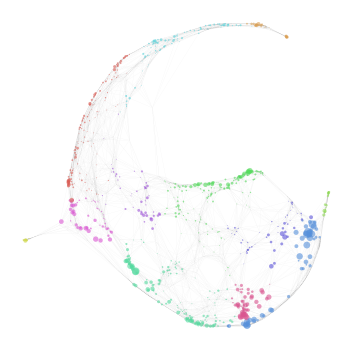

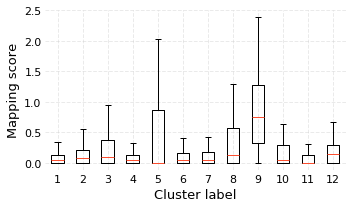

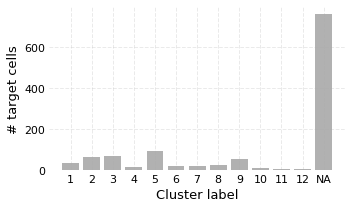

In [2]:
hvg_graph = nabo.Graph()
hvg_graph.load_from_gml('../analysis_data/hvg_graph.gml')
high_score_ref_nodes = hvg_graph.get_mapping_score(
    'ME', min_score=1, sorted_names_only=True, remove_suffix=True)
mapping = nabo.Mapping('../analysis_data/mapping.h5', 'WT',
                       '../analysis_data/hvg_pca_WT.h5', 'data')
mapping.set_parameters(15, 11, 0.25, 500)
mapping.map_target('MEnull', '../analysis_data/hvg_pca_ME.h5',
                   'data', ignore_ref_cells=high_score_ref_nodes)
hvg_graph.load_from_h5('../analysis_data/mapping.h5', 'MEnull', 'target')

null_mapping_score = hvg_graph.get_mapping_score('MEnull')
nabo.GraphPlot(hvg_graph, vc_attr='cluster', vs=null_mapping_score)

me_null_cluster_scores = hvg_graph.get_mapping_score('MEnull', by_cluster=True)
nabo.plot_cluster_scores(me_null_cluster_scores)
me_null_target_clusters = hvg_graph.classify_target('MEnull', ret_counts=True)
nabo.plot_target_class_counts(me_null_target_clusters)

In the second approach, the mapping is performed using PCA dimensions created using low variance genes (LVG) in the [Preprocessing notebook](1_preprocessing.ipynb).
We essentially take the same steps as we did before. We change the output filename to `lvg_mapping.h5` and the name of the input reference file to `lvg_pca_WT.h5`. The name of the input file for MLL-ENL target sample is changed to `lvg_pca_ME.h5`. We keep the same parameter values as before. Note that unlike the previous approach we do create a new reference graph here. We then create a new graph (called `lvg_graph` here) and load these mappings on it. We import the cluster information from `hvg_graph` and also the graph layout, to allow easy visual comparison (it must be noted that LVG graph can have a different set of edges than HVG graph).

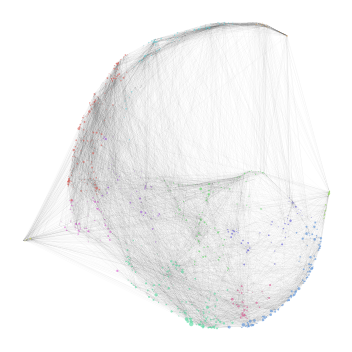

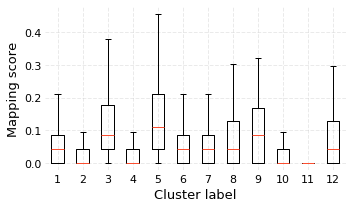

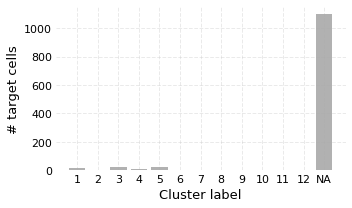

In [3]:
lvg_mapping = nabo.Mapping('../analysis_data/lvg_mapping.h5', 'WT',
                           '../analysis_data/lvg_pca_WT.h5', 'data')
lvg_mapping.set_parameters(15, 11, 0.25, 500)
lvg_mapping.make_ref_graph()
lvg_mapping.map_target('ME', '../analysis_data/lvg_pca_ME.h5', 'data')
lvg_graph = nabo.Graph()
lvg_graph.load_from_h5('../analysis_data/lvg_mapping.h5', 'WT', 'reference')
lvg_graph.load_from_h5('../analysis_data/lvg_mapping.h5', 'ME', 'target')

lvg_graph.import_clusters(hvg_graph.clusters)
lvg_graph.import_layout(hvg_graph)

lvg_mapping_score = lvg_graph.get_mapping_score('ME')
nabo.GraphPlot(lvg_graph, vc_attr='cluster', vs=lvg_mapping_score)

lvg_cluster_scores = lvg_graph.get_mapping_score('ME', by_cluster=True)
nabo.plot_cluster_scores(lvg_cluster_scores)
lvg_target_clusters = lvg_graph.classify_target('ME', ret_counts=True)
nabo.plot_target_class_counts(lvg_target_clusters)
lvg_graph.save_graph('../analysis_data/lvg_graph.gml')